In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
import pandas as pd

df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target


df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.data[:3]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

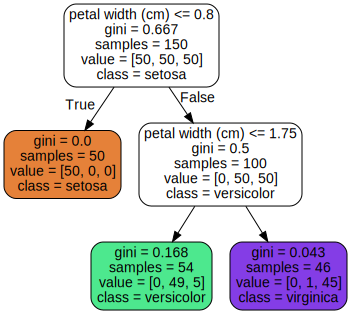

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree_clf,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded=True,
    filled=True # 색 칠해줌
)

graphviz.Source(dot_data)

# petal = 꽃잎, sepal = 꽃받침

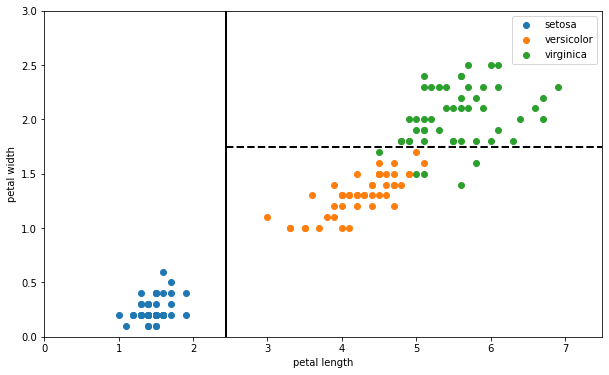

In [ ]:
import matplotlib.pyplot as plt


petal_length = X[:, 0]
petal_width = X[:, 1]

setosa = df_iris.loc[df_iris.target == 0, ["petal length (cm)", "petal width (cm)"]]
versicolor = df_iris.loc[df_iris.target == 1, ["petal length (cm)", "petal width (cm)"]]
virginica = df_iris.loc[df_iris.target == 2, ["petal length (cm)", "petal width (cm)"]]

plt.figure(figsize=(10, 6))


plt.scatter(setosa.loc[:,"petal length (cm)"], setosa.loc[:,"petal width (cm)"])
plt.scatter(versicolor.loc[:,"petal length (cm)"], versicolor.loc[:,"petal width (cm)"])
plt.scatter(virginica.loc[:,"petal length (cm)"], virginica.loc[:,"petal width (cm)"])
plt.legend(iris.target_names)


# plt.vlines(2.45, 0, 2.5, 'r')
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 8], [1.75, 1.75], "k--", linewidth = 2)

# plt.scatter(petal_length, petal_width, c= petal_length)

plt.axis([0, 7.5, 0, 3])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
setosa.loc[:10,"petal length (cm)"]

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
Name: petal length (cm), dtype: float64

In [ ]:
X[:3]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2]])

# 6.3 클래스 확률 추정

In [ ]:
tree_clf.predict_proba([[5, 1.5],
                        [3, 2]])

array([[0.        , 0.90740741, 0.09259259],
       [0.        , 0.02173913, 0.97826087]])

In [ ]:
tree_clf.predict([[5, 1.5],
                  [3, 2]])

array([1, 2])

# 6.7 규제 매개변수

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

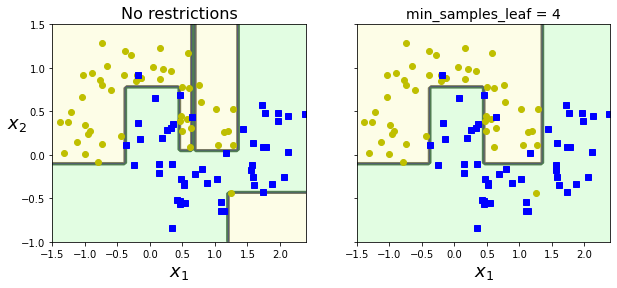

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

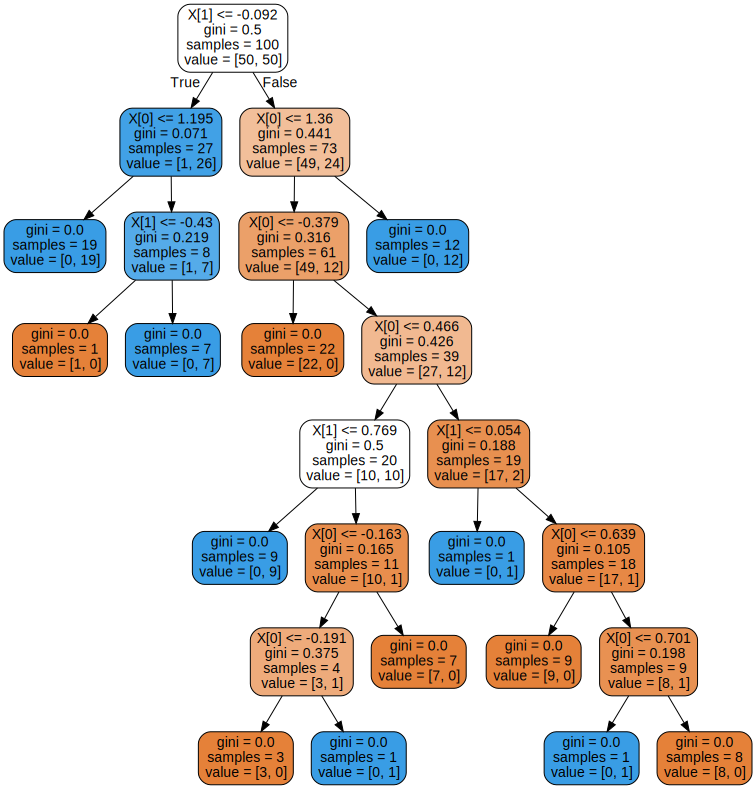

In [ ]:
dot_data2 = export_graphviz(
    deep_tree_clf1,
    # feature_names = iris.feature_names[2:],
    # class_names = iris.target_names,
    rounded=True,
    filled=True # 색 칠해줌
)

graphviz.Source(dot_data2)

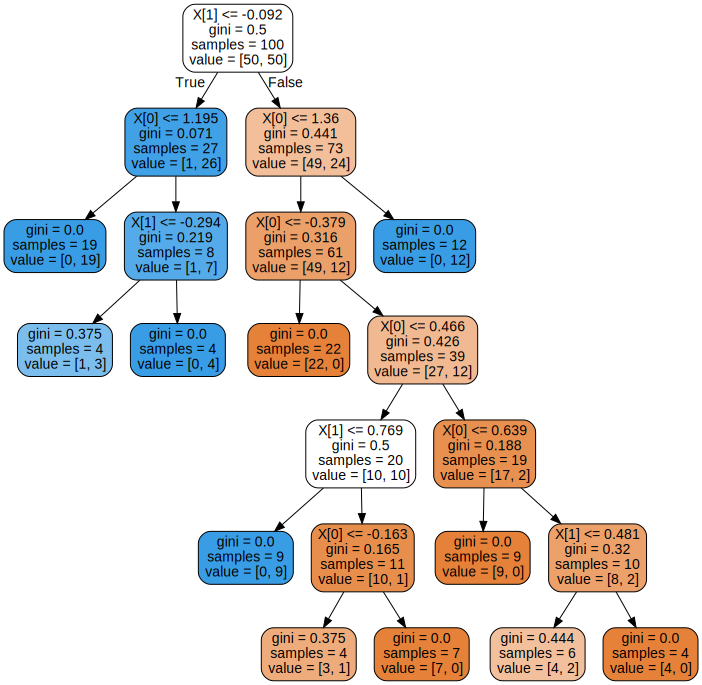

In [ ]:
dot_data2 = export_graphviz(
    deep_tree_clf2,
    # feature_names = iris.feature_names[2:],
    # class_names = iris.target_names,
    rounded=True,
    filled=True # 색 칠해줌
)

graphviz.Source(dot_data2)

# 6.8 회귀

In [ ]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

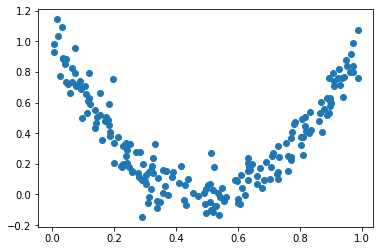

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2, criterion="mse")
tree_reg.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=2)

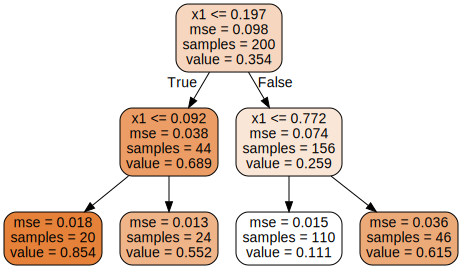

In [ ]:
dot_data4 = export_graphviz(
    tree_reg,
    feature_names = ["x1"],
    # class_names = iris.target_names,
    rounded=True,
    filled=True # 색 칠해줌
)

graphviz.Source(dot_data4)

규제가 없는 회귀 결정 트리

In [ ]:
tree_reg_none_res = DecisionTreeRegressor()
tree_reg_none_res.fit(X, y)

DecisionTreeRegressor()

In [ ]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

In [ ]:
y_pred = tree_reg_none_res.predict(x1)

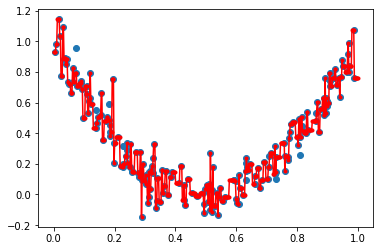

In [ ]:
plt.scatter(X, y)
plt.plot(x1, y_pred, 'r.-')